In [14]:
#Importando nossas bibliotecas:
from minisom import MiniSom
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pylab import pcolor, colorbar

In [5]:
#Definindo o Data Set e as variáveis
base=pd.read_csv('wines.csv')
x=base.iloc[:,1:14].values
y=base.iloc[:,0].values

In [7]:
#Precisamos normalizar nossos dados em uma escala de 0 a 1:
normalizador=MinMaxScaler(feature_range=(0,1))
x=normalizador.fit_transform(x)

In [10]:
#Construindo nosso mapa auto-organizável:
som= MiniSom(x=8, y=8, input_len=13, sigma=1.0, learning_rate=0.5, random_seed=2) # X equivale a quantas linhas nosso mapa vai ter // Y equivale a quantas colunas nosso mapa vai ter // input_len equivale a quantas entradas nosso programa vai ter // sigma equivale ao raio de espaço que irá capturar os neurônios próximos baseados no BMU (best matching unit) // learning_rate equivale a taxa de aprendizagem e é o que define como os valores pesos serão ajustados a cada rodada // random_seed executa a função de nos dar sempre o mesmo resultado de quanto executamos o programa
som.random_weights_init(x) #Atribuindo pesos aleatórios a nossa variavel
som.train_random(data=x,num_iteration=100)

In [11]:
som._weights #abaixo podemos visualizar 8 blocos de vetores e cada um contendo 13 pesos diferentes:

array([[[0.41619617, 0.39449386, 0.50685798, 0.4422608 , 0.28651455,
         0.62779354, 0.50350414, 0.5263484 , 0.54477405, 0.19242564,
         0.67435595, 0.63823686, 0.28429463],
        [0.72914786, 0.57451979, 0.52076754, 0.31312334, 0.38252807,
         0.62951827, 0.53988429, 0.23959452, 0.4316248 , 0.29844888,
         0.37657397, 0.72298876, 0.47053241],
        [0.53371796, 0.32082308, 0.51228125, 0.37102385, 0.25630737,
         0.44474728, 0.24429873, 0.66662266, 0.3169272 , 0.33613626,
         0.26874899, 0.34012126, 0.33540481],
        [0.28051343, 0.34827867, 0.83688038, 0.7920189 , 0.41270368,
         0.60188459, 0.75799137, 0.68549201, 0.42792331, 0.3603494 ,
         0.35878113, 0.70381793, 0.17784128],
        [0.58224813, 0.24425604, 0.54544019, 0.43512895, 0.31209432,
         0.43000405, 0.42551836, 0.58164702, 0.43839386, 0.20401329,
         0.59252411, 0.53116227, 0.40113876],
        [0.2678605 , 0.33046249, 0.48202195, 0.54613877, 0.20415451,
         0.

In [12]:
som._activation_map #Podemos ver 7 linhas com 8 volumes, e aqui podemos ver os valores do mapa auto organizavel:

array([[1.01875531, 1.10132912, 1.19866488, 1.40142351, 1.00705757,
        1.00729422, 1.02790339, 1.3191834 ],
       [1.27769625, 1.06089328, 1.09905025, 1.38558857, 1.17897137,
        1.09506616, 1.13952606, 1.07530871],
       [1.03590066, 1.09911785, 1.06776071, 1.12662746, 0.94804238,
        1.03776935, 1.07421396, 1.15995304],
       [0.95989401, 1.08160766, 1.08224608, 1.11256251, 1.1814428 ,
        1.3585863 , 0.96833328, 0.96678035],
       [1.19789377, 1.08917309, 1.04282663, 0.96058684, 1.26527795,
        1.20642795, 0.97870479, 1.00570549],
       [0.81107365, 0.86585837, 0.88651701, 0.84704386, 1.43930838,
        1.35380316, 1.0214357 , 1.157416  ],
       [1.3460159 , 0.84860074, 0.79616552, 1.00829361, 1.23153114,
        0.96697443, 0.86562016, 0.95414742],
       [0.9546346 , 0.91339806, 1.21402751, 1.07032451, 1.18476395,
        1.22011074, 0.9766536 , 0.84369113]])

In [13]:
q=som.activation_response(x) #Criando a variavel "q" para receber "x" usando o act_resp para transformar X em uma matriz 8x8, assim como conseguimos visualizar quantas vezes cada um dos neurônios foi selecionado como BMU

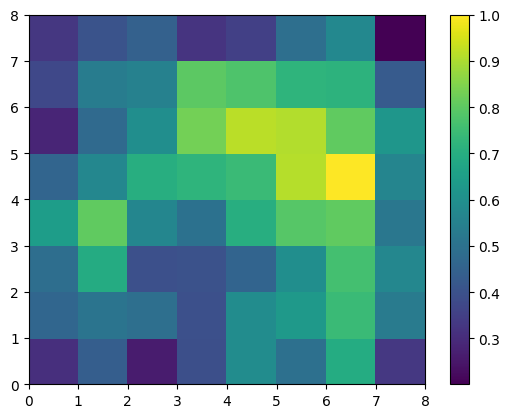

In [24]:
pcolor(som.distance_map().T) #Irá nos retornar uma matriz com os valores de distância // Além disso essa função irá calcular o valor MID (Mean Inter Neuron Distance) ou seja ira calcular a média da distância de cada neurônio em relação aos seus vizinhos // Colocamos o ".T" pois ele irá retornar a matriz transposta. (O que era coluna vira linha e o que era linha vira coluna)
colorbar()

In [ ]:
#O Color Bar acima indica que, quanto mais escuro for o neurônio (média próxima de 0), maior é a semelhança dele com seus vizinhos. E quanto mais claro ele for (mais próximo de 1), mais diferente ele é dos seus vizinhos.

In [28]:
w=som.winner(x[2]) #Ira nos retornar neurônio ganhador dentro de cada um dos registros ou o BMU (em suma o melhor neurônio)
markers=['o','s','D'] #Criando uma lista com valores aleatórios
color=['r','g','b'] #Criando uma lista de cores sendo R=Red,G=green,B=blue

In [29]:
y[y==1]=0 #Se o Y for igual a 1, ele será atribuido a 0
y[y==2]=1 #Se o Y for igual a 2, ele será atribuido a 1
y[y==3]=2 #Se o Y for igual a 3, ele será atribuido a 2

In [30]:
for i, x in enumerate(x): 
    print(i)
    print(x)

0
[0.84210526 0.1916996  0.57219251 0.25773196 0.61956522 0.62758621
 0.57383966 0.28301887 0.59305994 0.37201365 0.45528455 0.97069597
 0.56134094]
1
[0.57105263 0.2055336  0.4171123  0.03092784 0.32608696 0.57586207
 0.51054852 0.24528302 0.27444795 0.26450512 0.46341463 0.78021978
 0.55064194]
2
[0.56052632 0.3201581  0.70053476 0.41237113 0.33695652 0.62758621
 0.61181435 0.32075472 0.75709779 0.37542662 0.44715447 0.6959707
 0.64693295]
3
[0.87894737 0.23913043 0.60962567 0.31958763 0.4673913  0.98965517
 0.66455696 0.20754717 0.55835962 0.55631399 0.30894309 0.7985348
 0.85734665]
4
[0.58157895 0.36561265 0.80748663 0.53608247 0.52173913 0.62758621
 0.49578059 0.49056604 0.44479495 0.25938567 0.45528455 0.60805861
 0.32596291]
5
[0.83421053 0.20158103 0.5828877  0.2371134  0.45652174 0.78965517
 0.64345992 0.39622642 0.49211356 0.46672355 0.46341463 0.57875458
 0.83594864]
6
[0.88421053 0.22332016 0.5828877  0.20618557 0.2826087  0.52413793
 0.45991561 0.32075472 0.49526814 0.338